In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
city_df=pd.read_csv("city_data.csv")
ride_df=pd.read_csv("ride_data.csv")

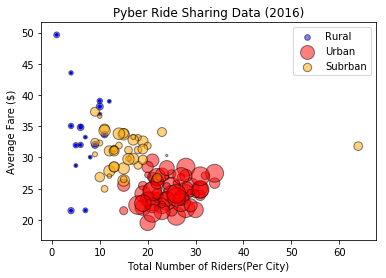

In [8]:
city_ride_df = pd.merge(city_df,ride_df, on='city')

urban_city=city_ride_df.loc[city_ride_df['type']=='Urban',:]
rural_city=city_ride_df.loc[city_ride_df['type']=='Rural',:]
suburban_city=city_ride_df.loc[city_ride_df['type']=='Suburban',:]
urban_city = urban_city.reset_index(drop=True)
suburban_city = suburban_city.reset_index(drop=True)
rural_city = rural_city.reset_index(drop=True)



rural_city_grouped  = rural_city.groupby(['city'])


x=rural_city_grouped.head(1)
x=x.reset_index(drop=True)
x_grouped = x.groupby(['city'])
x_grouped['driver_count'].head()



rural_city_grouped_df = pd.DataFrame({"Average Fare":rural_city_grouped['fare'].sum()/rural_city_grouped['fare'].count(),
                                      "Rides per City":rural_city_grouped['fare'].count(),
                                    "Driver Count":x_grouped['driver_count'].sum() })
#rural_city_grouped_df["Average Fare"] = rural_city_grouped_df["Average Fare"].map("{:.2f}".format)
rural_plot=rural_city_grouped_df.plot(kind='scatter', x='Rides per City',y='Average Fare',s=rural_city_grouped_df['Driver Count'],
                                     label='Rural',color='Blue')
r_plot = plt.scatter(rural_city_grouped_df['Rides per City'],rural_city_grouped_df['Average Fare'],
                     s=rural_city_grouped_df['Driver Count']*5,color='Blue',label='Rural',edgecolor='black',alpha=0.5 )


urban_city_grouped  = urban_city.groupby(['city'])
x=urban_city_grouped.head(1)
x=x.reset_index(drop=True)
x_grouped = x.groupby(['city'])
x_grouped['driver_count'].head()

urban_city_grouped_df = pd.DataFrame({"Average Fare":urban_city_grouped['fare'].sum()/urban_city_grouped['fare'].count(),
                                      "Rides per City":urban_city_grouped['fare'].count(),
                                    "Driver Count":x_grouped['driver_count'].sum() })
#rural_city_grouped_df["Average Fare"] = rural_city_grouped_df["Average Fare"].map("{:.2f}".format)
urb_plot = plt.scatter(urban_city_grouped_df['Rides per City'],urban_city_grouped_df['Average Fare'],
                     s=urban_city_grouped_df['Driver Count']*5,color='Red',label='Urban',edgecolor='black',alpha=0.5 )




suburban_city_grouped  = suburban_city.groupby(['city'])
x=suburban_city_grouped.head(1)
x=x.reset_index(drop=True)
x_grouped = x.groupby(['city'])
x_grouped['driver_count'].head()
suburban_city_grouped_df = pd.DataFrame({"Average Fare":suburban_city_grouped['fare'].sum()/suburban_city_grouped['fare'].count(),
                                      "Rides per City":suburban_city_grouped['fare'].count(),
                                    "Driver Count":x_grouped['driver_count'].sum() })
#rural_city_grouped_df["Average Fare"] = rural_city_grouped_df["Average Fare"].map("{:.2f}".format)
suburb_plot = plt.scatter(suburban_city_grouped_df['Rides per City'],suburban_city_grouped_df['Average Fare'],
                     s=suburban_city_grouped_df['Driver Count']*5,color='Orange',label='Subrban',edgecolor='black',alpha=0.5 )
plt.legend(handles=[r_plot,urb_plot,suburb_plot], loc="best")
plt.xlabel("Total Number of Riders(Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.show()
#Trend Analysis #1
#When looking at the bubble plot it seems that urban populations bring in the most amount of cash and have the most amount of
#riders/drivers compared to the other populations. This makes sense as urban populations tend to be more crowded and thus there 
#is a higher demand for taxi services.

#Trend Analysis #2
#Whats interestingn to me is that the rural fares tend to be higher than suburban and urban, this is most likely due to the fact
#that the population size in rural areas are much smaller than a suburban/urban area and thus if a taxi service is needed, it is 
#much more likely to charge a higher price since the demand isn't as high as it would be within a city.





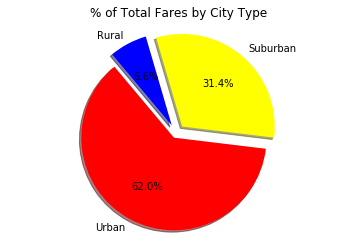

In [4]:
#Total Fare
all_fares=[]
labels=["Urban","Suburban","Rural"]
colors=['Red','Yellow','Blue']

urb_fare=urban_city['fare'].sum()
all_fares.append(urb_fare)

suburban_fare=suburban_city['fare'].sum()
all_fares.append(suburban_fare)

rural_fare=rural_city['fare'].sum()
all_fares.append(rural_fare)

explode = (0.05, 0.1, 0.1)
plt.pie(all_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()



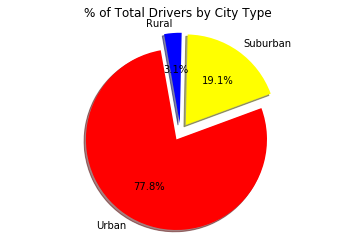

In [5]:
all_drivers=[]
labels=["Urban","Suburban","Rural"]
colors=['Red','Yellow','Blue']

total_drivers=city_df.groupby(['type'])
drivers=total_drivers['driver_count'].sum()

all_drivers.append(drivers['Urban'])
all_drivers.append(drivers['Suburban'])
all_drivers.append(drivers['Rural'])


explode = (0.09, 0.1, 0.1)
plt.pie(all_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()

#Trend Analysis #3
#As you can see by the pie chart urban populations have a much higher driver count than suburban and rural populations combined,
#this is due there being more people living in cities and the demand for taxis increase with population size


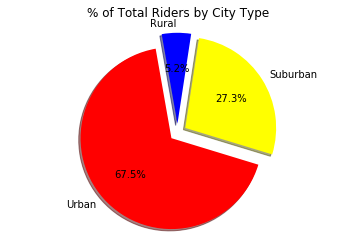

In [7]:
all_riders=[]
labels=["Urban","Suburban","Rural"]
colors=['Red','Yellow','Blue']


all_riders.append(len(urban_city['fare']))
all_riders.append(len(suburban_city['fare']))
all_riders.append(len(rural_city['fare']))

explode = (0.09, 0.1, 0.1)
plt.pie(all_riders, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.axis("equal")
plt.title("% of Total Riders by City Type")
plt.show()

